# Title: Classification of Forest Cover Types

Group 46

Team Member:
- Tan Xi En 1904098 P4
- Ngu Jia Yee 1805138
- Yeoh Siow Poo 1802886 P4

The aim of our notebook is to evaluate the type of cover type of the forest based on features such as soil type, wilderness areas and special features such as hillshade and slope.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("train.csv", index_col = "Id")

#### Undestanding Data Structure

In [3]:
print("Data Dimension: ")
print("Number of Records: {}".format(data.shape[0]))
print("Number of features: {}".format(data.shape[1]))

Data Dimension: 
Number of Records: 15120
Number of features: 55


In [4]:
print("Name of features: ")
data.columns

Name of features: 


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

- All columns data types is int64

####  Describing the data

In [6]:
data.iloc[:,:10].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


In [7]:
data.iloc[:,10:14].describe()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.237897,0.033003,0.419907,0.309193
std,0.425810,0.178649,0.493560,0.462176
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [8]:
data.iloc[:,14:34].describe()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193
std,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.iloc[:,34:54].describe()

,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357
std,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.iloc[:,54].describe()

count    15120.000000
mean         4.000000
std          2.000066
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Cover_Type, dtype: float64

Based on the data statistics above, we can conclude 3 things:
- There are negative values present, i.e. The miminum of Vertical Distance to Hydrology
- Scales are not the same for all. So,we have to standardized the data for easy rescaling
- Soil Type 7 and Soil Type 15 are 0 in every areas. Hence, they will have no predictive power

#### Class Distribution

In [11]:
data.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

- All classes are perfectly balanced. Hence, rebalancing is not necessary

Also, we are able to assume that there are altogether 7 different types of Cover Types.

Cover Types: 

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

####  Missing Values

In [12]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


- There appears to be no missing values. So, imputer will not be needed

#### Data Skewness

Skewness is a measure of symmetry in distribution
- If skewness is equal to zero, then data is perfectly symmetrical
- If skewness is positive, then data is skewed to the right
- If skewness is negative, then data is skewed to the left

In [13]:
data.skew()

Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6                              4.506716
Soil_Type7          

Based on the above skewness values, we can see that:
- Soil_Type8 and Soil_Type25 are extremely positively skewed
- Hillshade data are negatively skewed

#### Data Standard Deviation

The standard Deviation of the data explains how spread out the data is. 
- A large standard deviation means the dataset is very spread out. 
- A small standard deviation means that the dataset is very close to mean.

Low Standard Deviation scores also mean that the features more or less has no predictive power, and can be potentially removed.

In [14]:
data.std().sort_values(ascending=False)

Horizontal_Distance_To_Roadways       1325.066358
Horizontal_Distance_To_Fire_Points    1099.936493
Elevation                              417.678187
Horizontal_Distance_To_Hydrology       210.075296
Aspect                                 110.085801
Vertical_Distance_To_Hydrology          61.239406
Hillshade_3pm                           45.895189
Hillshade_9am                           30.561287
Hillshade_Noon                          22.801966
Slope                                    8.453927
Cover_Type                               2.000066
Wilderness_Area3                         0.493560
Wilderness_Area4                         0.462176
Wilderness_Area1                         0.425810
Soil_Type10                              0.348719
Soil_Type29                              0.279461
Soil_Type3                               0.244091
Soil_Type4                               0.229454
Soil_Type23                              0.218089
Soil_Type38                              0.214086


Based on the above standard deviation values, we can see that:
- Soil_Type7 and Soil_Type15 have an std value of 0, hence they will have no predictive power.
- Soil_Type21, Soil_Type27, Soil_Type36, Soil_Type9, Soil_Type28, Soil_Type25, Soil_Type8 have very small std scores. This means that they are very close to mean score. Hence, they will be of no help to the model and can be removed.

### Stats by Each Cover Type

####  Forest Cover Type 1 - Spruce/Fir

In [15]:
data[data.Cover_Type == 1].drop("Cover_Type", axis = 1).describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,...,2160.000000,2160.000000,2160.000000,2160.0,2160.000000,2160.0,2160.0,2160.000000,2160.000000,2160.000000
mean,3128.025926,159.463426,13.112963,271.507407,41.281481,2579.715741,211.690278,223.248611,144.065741,1994.412963,...,0.052778,0.106481,0.085185,0.0,0.001389,0.0,0.0,0.037037,0.036574,0.022685
std,156.124988,117.280496,6.817153,221.250993,55.740461,1495.176212,25.399338,17.975428,36.114843,1249.350813,...,0.223641,0.308524,0.279222,0.0,0.037251,0.0,0.0,0.188896,0.187757,0.148932
min,2525.000000,0.000000,1.000000,0.000000,-97.000000,108.000000,86.000000,125.000000,0.000000,30.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,3036.000000,54.000000,8.000000,90.000000,4.000000,1380.000000,199.000000,214.000000,122.000000,1080.250000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,3144.000000,123.000000,12.000000,218.000000,23.000000,2377.000000,216.000000,226.000000,144.000000,1817.500000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,3234.000000,286.000000,17.000000,395.000000,61.000000,3601.250000,230.000000,236.000000,169.000000,2642.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000
max,3675.000000,359.000000,41.000000,1129.000000,411.000000,6508.000000,254.000000,254.000000,246.000000,6993.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000


#### Forest Cover Type 2 - Lodgepole Pine

In [16]:
data[data.Cover_Type == 2].drop("Cover_Type", axis = 1).describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,...,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.0,2160.000000,2160.000000,2160.000000
mean,2922.540278,151.097222,13.423611,287.728704,47.337963,2425.791667,214.044444,225.369907,142.950926,2155.277315,...,0.044907,0.118056,0.085185,0.005556,0.000463,0.000926,0.0,0.003241,0.001389,0.001389
std,185.778268,107.320930,7.038483,215.373206,59.137843,1629.381089,25.033870,18.216843,35.187638,1407.321563,...,0.207149,0.322749,0.279222,0.074345,0.021517,0.030422,0.0,0.056848,0.037251,0.037251
min,2169.000000,0.000000,0.000000,0.000000,-146.000000,30.000000,83.000000,115.000000,6.000000,42.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2802.000000,60.000000,8.000000,124.000000,9.000000,1110.000000,202.000000,215.000000,120.000000,1167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,2931.500000,125.000000,13.000000,242.000000,31.000000,2023.500000,220.000000,227.000000,141.000000,1851.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,3042.000000,238.000000,17.000000,404.000000,68.000000,3413.750000,232.000000,239.000000,166.000000,2642.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,3413.000000,359.000000,45.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6723.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


#### Forest Cover Type 3 - Ponderosa Pine

In [17]:
data[data.Cover_Type == 3].drop("Cover_Type", axis = 1).describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,...,2160.0,2160.000000,2160.0,2160.0,2160.0,2160.0,2160.0,2160.0,2160.0,2160.0
mean,2398.423148,173.672685,20.628704,210.723148,64.081944,969.595833,201.655556,216.561111,141.549537,916.909722,...,0.0,0.002315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,194.108147,108.013267,8.888591,142.053957,58.333807,620.000509,40.366706,27.519785,51.582375,532.464556,...,0.0,0.048068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1903.000000,0.000000,1.000000,0.000000,-115.000000,0.000000,58.000000,120.000000,0.000000,30.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2270.000000,86.000000,14.000000,90.000000,19.000000,480.000000,173.000000,200.000000,106.000000,514.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2409.000000,161.000000,21.000000,190.000000,51.000000,897.000000,212.000000,222.000000,142.000000,828.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2551.000000,277.000000,27.000000,306.000000,97.000000,1318.000000,235.000000,238.000000,180.000000,1200.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2850.000000,360.000000,47.000000,700.000000,275.000000,3181.000000,254.000000,254.000000,248.000000,2846.000000,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Forest Cover Type 4 - Cottonwood/Willow

In [18]:
data[data.Cover_Type == 4].drop("Cover_Type", axis = 1).describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,2160.00000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,...,2160.0,2160.0,2160.0,2160.0,2160.0,2160.0,2160.0,2160.0,2160.0,2160.0
mean,2223.42037,138.099537,18.468519,104.537500,40.143519,915.100463,227.968056,216.889815,111.808796,860.540741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,102.92994,88.846589,9.361156,138.452917,58.343108,361.208979,24.288340,21.006249,49.383949,482.990176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1989.00000,0.000000,1.000000,0.000000,-25.000000,67.000000,127.000000,137.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2140.00000,82.000000,10.000000,0.000000,0.000000,629.000000,215.000000,204.000000,74.000000,459.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2230.50000,119.000000,18.000000,30.000000,6.000000,942.000000,234.000000,220.000000,114.000000,808.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2304.25000,162.000000,26.000000,192.000000,69.000000,1207.000000,249.000000,231.000000,150.000000,1256.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2526.00000,359.000000,46.000000,551.000000,270.000000,1702.000000,254.000000,254.000000,230.000000,1921.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Forest Cover Type 5 - Aspen

In [19]:
data[data.Cover_Type == 5].drop("Cover_Type", axis = 1).describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,...,2160.000000,2160.000000,2160.000000,2160.000000,2160.0,2160.0,2160.0,2160.0,2160.0,2160.0
mean,2786.801389,137.992130,16.724537,208.873148,50.871296,1329.318519,223.368981,218.317130,121.392593,1530.388889,...,0.040278,0.046296,0.053241,0.001852,0.0,0.0,0.0,0.0,0.0,0.0
std,96.177469,91.772285,8.440048,179.159524,58.463641,1041.100986,22.487451,25.980805,50.121931,976.589203,...,0.196655,0.210175,0.224565,0.043003,0.0,0.0,0.0,0.0,0.0,0.0
min,2482.000000,0.000000,1.000000,0.000000,-134.000000,30.000000,130.000000,99.000000,0.000000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2729.000000,69.000000,10.000000,85.000000,5.000000,420.000000,211.000000,204.000000,84.000000,850.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,2793.000000,108.000000,16.000000,170.000000,35.000000,1253.500000,228.000000,224.000000,128.000000,1432.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,2856.000000,192.000000,22.000000,295.000000,82.000000,1956.000000,241.000000,238.000000,158.000000,1933.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,3007.000000,359.000000,50.000000,1082.000000,262.000000,5198.000000,254.000000,254.000000,229.000000,6279.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


#### Forest Cover Type 6 - Douglas-fir

In [20]:
data[data.Cover_Type == 6].drop("Cover_Type", axis = 1).describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,...,2160.000000,2160.000000,2160.000000,2160.000000,2160.0,2160.0,2160.0,2160.0,2160.0,2160.0
mean,2423.276852,180.617130,18.986111,160.095370,44.873611,1064.980556,193.562963,209.960648,147.682407,1057.654167,...,0.003241,0.013889,0.030556,0.000926,0.0,0.0,0.0,0.0,0.0,0.0
std,188.966981,133.087862,7.714618,125.770515,47.034674,576.384899,33.684031,23.934851,45.588500,576.691004,...,0.056848,0.117057,0.172150,0.030422,0.0,0.0,0.0,0.0,0.0,0.0
min,1863.000000,0.000000,1.000000,0.000000,-104.000000,0.000000,0.000000,127.000000,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2319.750000,44.000000,13.000000,60.000000,7.000000,626.000000,169.000000,195.000000,114.000000,643.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,2430.000000,171.000000,19.000000,134.000000,33.000000,993.000000,196.000000,213.000000,150.000000,942.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,2553.000000,318.000000,24.000000,240.000000,73.000000,1420.500000,221.000000,227.000000,184.000000,1364.250000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,2883.000000,360.000000,52.000000,624.000000,249.000000,3078.000000,254.000000,254.000000,238.000000,2918.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


#### Forest Cover Type 7 - Krummholz

In [21]:
data[data.Cover_Type == 7].drop("Cover_Type", axis = 1).describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,...,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,3362.769907,155.794444,14.166667,346.904630,68.945833,2713.659722,216.639815,222.412037,136.193981,2062.847222,...,0.012500,0.032407,0.031019,0.001852,0.045370,0.003704,0.015741,0.296759,0.266204,0.188426
std,109.126811,110.912616,7.315810,293.786336,80.400320,1206.313419,23.561316,19.405921,37.999255,1091.651985,...,0.111128,0.177121,0.173408,0.043003,0.208163,0.060759,0.124500,0.456935,0.442074,0.391142
min,2870.000000,0.000000,0.000000,0.000000,-74.000000,514.000000,97.000000,99.000000,0.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3299.000000,67.000000,9.000000,108.000000,8.000000,1726.500000,202.000000,212.000000,114.000000,1140.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3364.000000,126.000000,13.000000,270.000000,42.000000,2611.500000,221.000000,224.000000,142.000000,1963.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3410.000000,246.250000,18.000000,511.000000,106.250000,3723.250000,234.000000,236.000000,162.250000,2864.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,3849.000000,359.000000,49.000000,1294.000000,403.000000,5463.000000,254.000000,254.000000,226.000000,4481.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

In [22]:
import matplotlib.pyplot as plt

# Categorical Features

## Cover Types

There are altogether 7 cover types as  mentioned in description

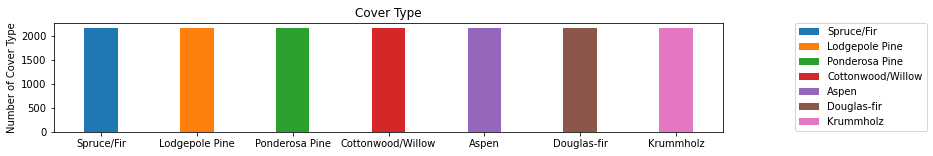

,Cover Type
Spruce/Fir,2160
Lodgepole Pine,2160
Ponderosa Pine,2160
Cottonwood/Willow,2160
Aspen,2160
Douglas-fir,2160
Krummholz,2160


In [23]:
from matplotlib import cm
cvr_title = ['Spruce/Fir','Lodgepole Pine','Ponderosa Pine', 'Cottonwood/Willow','Aspen','Douglas-fir','Krummholz']

final = []

for i in range(1,8):
    final.append(len(data[data.iloc[:,54]== i]))
    
width = 0.35

fig, ax = plt.subplots(figsize=(12,2))

x = np.arange(len(final))
for i in range(len(final)):
    ax.bar(i,final[i],width, label=cvr_title[i])

ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(x,cvr_title)
plt.title("Cover Type")
plt.ylabel("Number of Cover Type")
plt.show()

#Draw Table
pd.DataFrame(final, index=cvr_title, columns=['Cover Type'])

#### Wild Areas

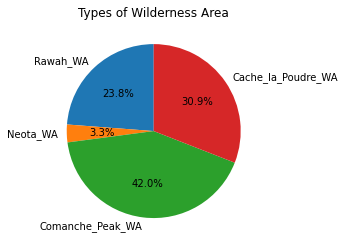

,Wilderness Area(%)
Rawah_WA,23.79
Neota_WA,3.30
Comanche_Peak_WA,41.99
Cache_la_Poudre_WA,30.92


In [24]:
w_title = ["Rawah_WA", "Neota_WA", "Comanche_Peak_WA", "Cache_la_Poudre_WA"]
sizes = []

for i in range(10,14):
    sizes.append(len(data[data.iloc[:,i]==1]))

fig, ax = plt.subplots()
ax.pie(sizes, labels=w_title, autopct='%1.1f%%', startangle=90)
plt.title("Types of Wilderness Area")
plt.show()

#Draw Table
pd.DataFrame([round(sizes[i]/len(data)*100,2) for i in range(len(sizes))], index=w_title, columns=['Wilderness Area(%)'])

#### Soil Types

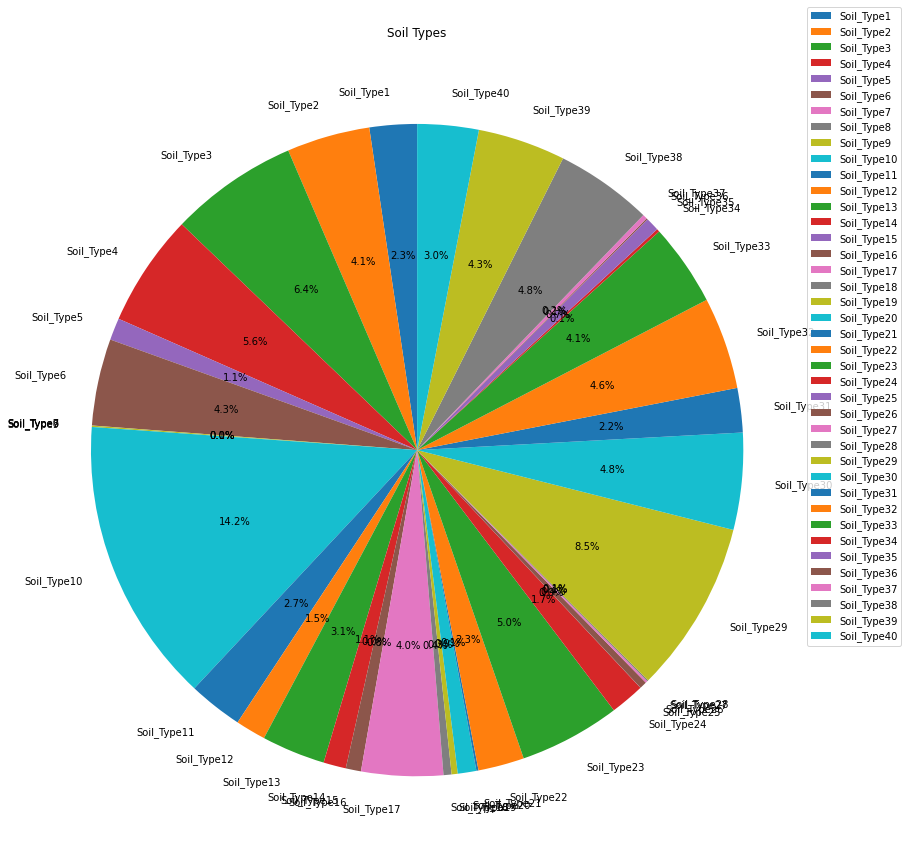

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10
Soil Type(%),2.35,4.12,6.36,5.58,1.09,4.3,0.0,0.01,0.07,14.17


,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20
Soil Type(%),2.69,1.5,3.15,1.12,0.0,0.75,4.05,0.4,0.3,0.92


,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30
Soil Type(%),0.11,2.28,5.01,1.7,0.01,0.36,0.1,0.06,8.54,4.79


,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Soil Type(%),2.2,4.56,4.07,0.15,0.67,0.07,0.22,4.81,4.35,3.04


In [25]:
sizes = []

for i in range(14,54):
    sizes.append(len(data[data.iloc[:,i]==1]))

fig, ax = plt.subplots(figsize=(15,15))
ax.pie(sizes, labels=data.columns[14:54], autopct='%1.1f%%', startangle=90)
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Soil Types")
plt.show()

#Draw Table
temp_df = pd.DataFrame([round(sizes[i]/len(data)*100,2) for i in range(len(sizes))], index=data.columns[14:54], columns=['Soil Type(%)'])
for i in range(4):
    display(temp_df.iloc[(i*10):(i+1)*10].transpose())

#### Wilderness Areas according to Cover Types

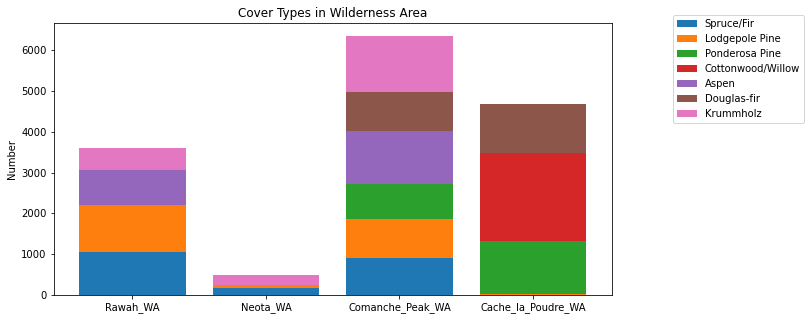

,Rawah_WA,Neota_WA,Comanche_Peak_WA,Cache_la_Poudre_WA
Spruce/Fir,1062,181,917,0
Lodgepole Pine,1134,66,940,20
Ponderosa Pine,0,0,863,1297
Cottonwood/Willow,0,0,0,2160
Aspen,856,0,1304,0
Douglas-fir,0,0,962,1198
Krummholz,545,252,1363,0


In [26]:
temp, final = [], []

temp_df = pd.DataFrame()

for k in range(10,14):
    a = data.iloc[:,k]==1
    temp = []
    for i in range(1,8):
        b = data.iloc[:,54]==i
        temp.append(len(data[a & b]))
    temp_df[w_title[k-10]] = temp
    final.append(temp)
    
final = np.array(final)

x = np.arange(final.shape[0])

fig, ax=plt.subplots(figsize=(10,5))
for i in range(final.shape[1]):
    bottom=np.sum(final[:,0:i], axis=1)  
    ax.bar(x,final[:,i], bottom=bottom, label=cvr_title[i])
    
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(x,w_title)
plt.ylabel("Number")
plt.title("Cover Types in Wilderness Area")
plt.show()

#Draw Table
temp_df.index = cvr_title
display(temp_df)
    

#### Soil Types According to Cover Types

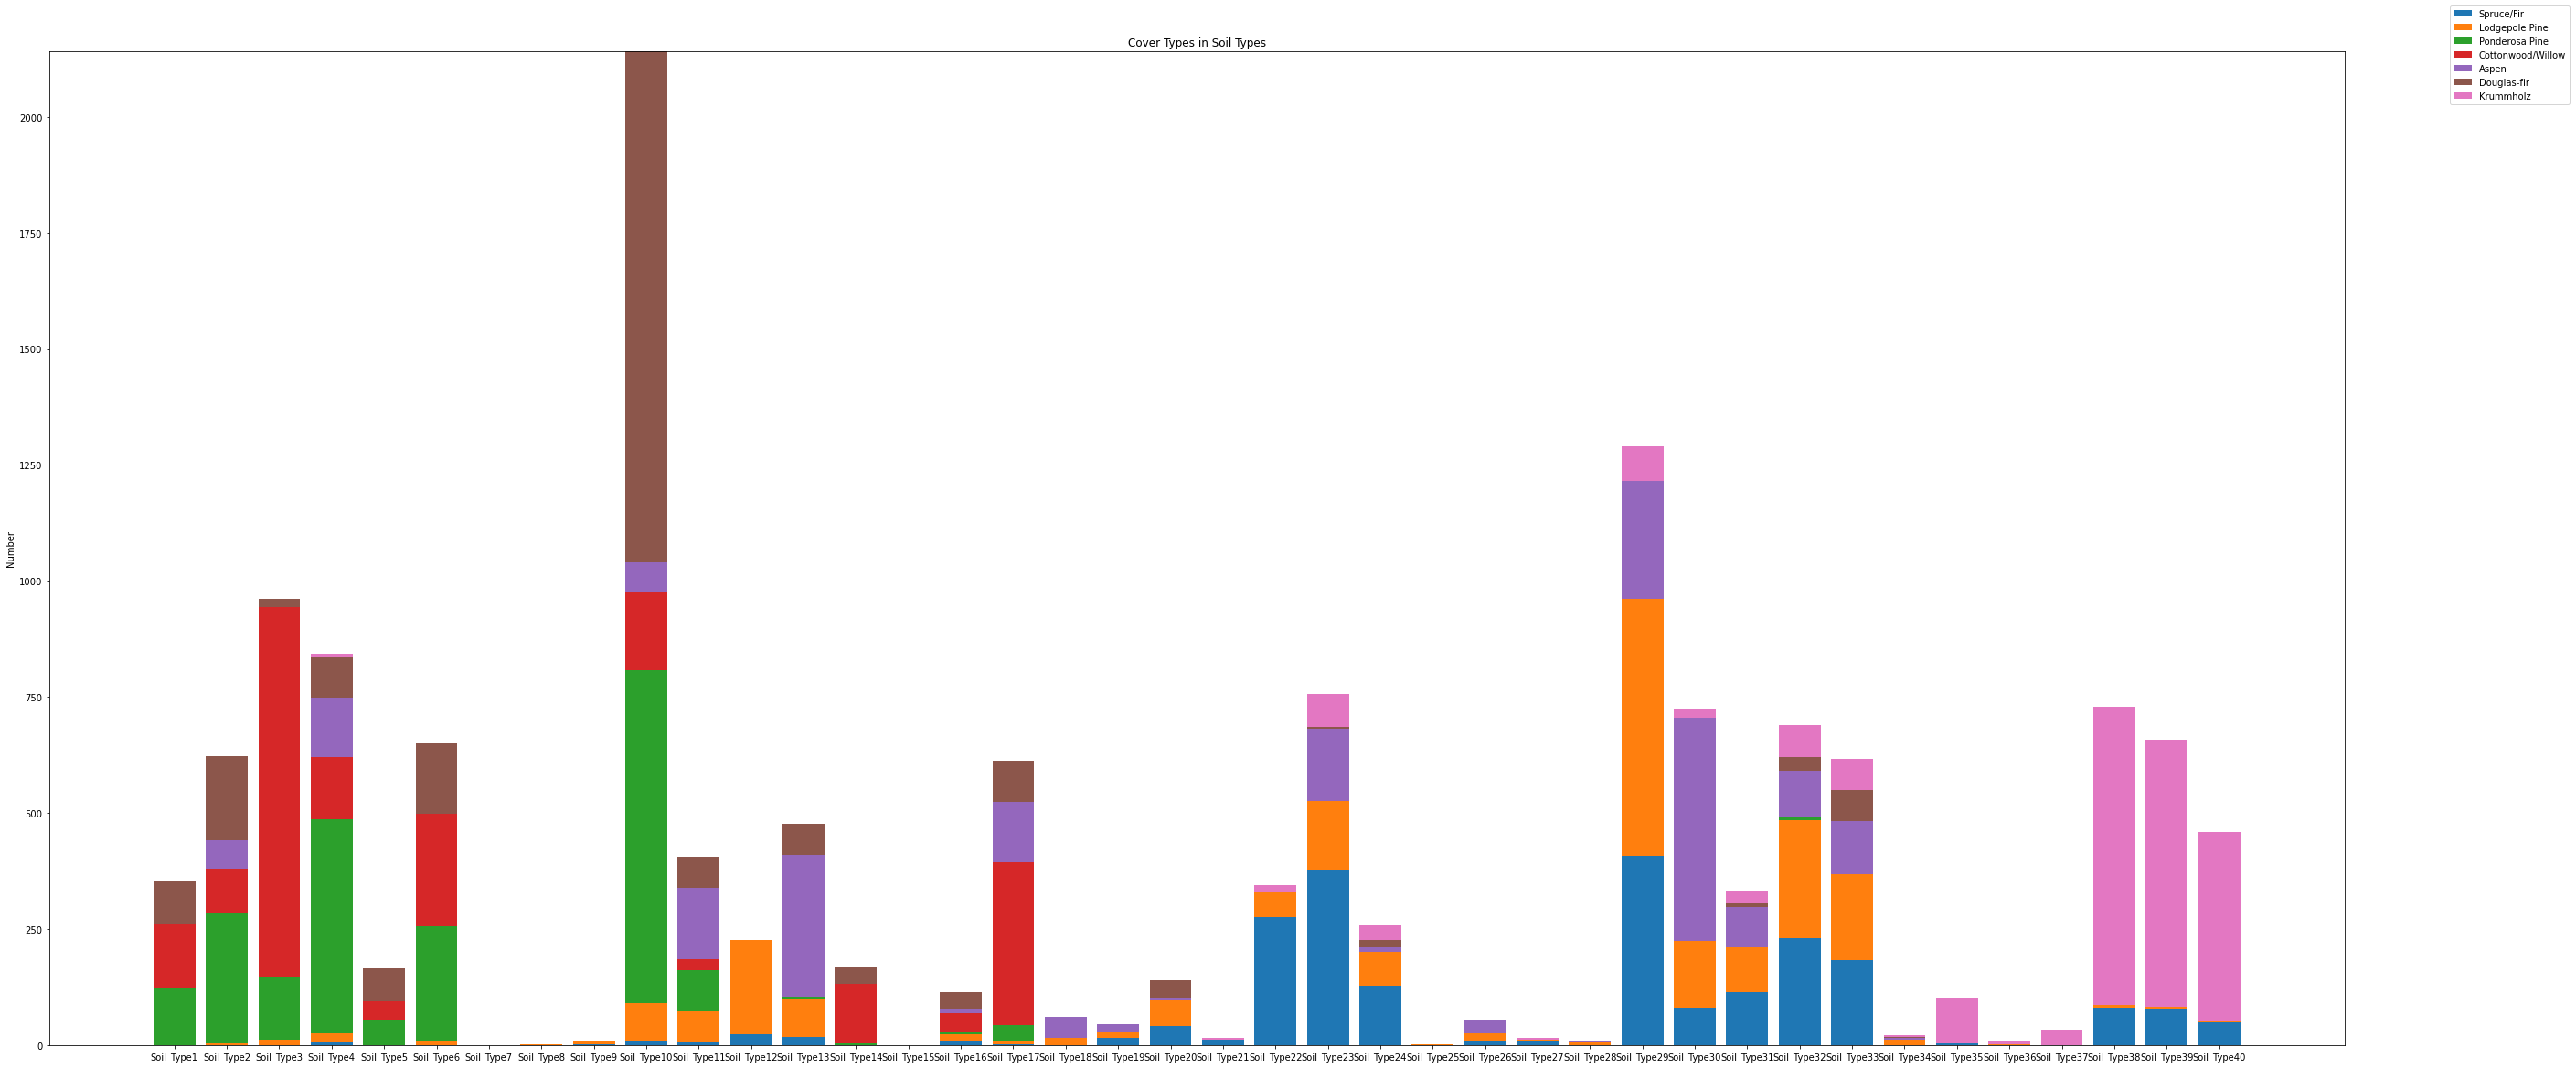

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10
Spruce/Fir,0,0,0,5,0,0,0,0,1,9
Lodgepole Pine,0,3,12,20,0,7,0,1,9,81
Ponderosa Pine,121,283,133,462,55,248,0,0,0,717
Cottonwood/Willow,139,94,799,133,39,244,0,0,0,170
Aspen,0,61,0,129,0,0,0,0,0,64
Douglas-fir,95,182,18,87,71,151,0,0,0,1101
Krummholz,0,0,0,7,0,0,0,0,0,0


,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20
Spruce/Fir,5,24,17,0,0,9,2,0,15,41
Lodgepole Pine,67,203,84,0,0,14,7,16,13,55
Ponderosa Pine,89,0,4,4,0,5,34,0,0,0
Cottonwood/Willow,24,0,0,128,0,40,350,0,0,0
Aspen,154,0,305,0,0,9,131,44,18,6
Douglas-fir,67,0,66,37,0,37,88,0,0,37
Krummholz,0,0,0,0,0,0,0,0,0,0


,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30
Spruce/Fir,12,275,376,128,0,7,7,0,407,81
Lodgepole Pine,0,54,149,72,1,19,5,6,554,144
Ponderosa Pine,0,0,0,0,0,0,0,0,0,0
Cottonwood/Willow,0,0,0,0,0,0,0,0,0,0
Aspen,0,0,157,11,0,28,0,3,254,480
Douglas-fir,0,0,3,15,0,0,0,0,0,0
Krummholz,4,16,72,31,0,0,3,0,76,20


,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Spruce/Fir,114,230,184,0,3,0,0,80,79,49
Lodgepole Pine,97,255,184,12,1,2,0,7,3,3
Ponderosa Pine,0,5,0,0,0,0,0,0,0,0
Cottonwood/Willow,0,0,0,0,0,0,0,0,0,0
Aspen,87,100,115,4,0,0,0,0,0,0
Douglas-fir,7,30,66,2,0,0,0,0,0,0
Krummholz,27,70,67,4,98,8,34,641,575,407


In [27]:
temp, final = [], []

soil_title = data.iloc[:,14:54].columns

temp_df = pd.DataFrame()

for k in range(14,54):
    a = data.iloc[:,k]==1
    temp = []
    for i in range(1,8):
        b = data.iloc[:,54]==i
        temp.append(len(data[a & b]))
    temp_df[soil_title[k-14]] = temp
    final.append(temp)
    
final = np.array(final)

x = np.arange(final.shape[0])

fig, ax=plt.subplots(figsize=(45,20))
for i in range(final.shape[1]):
    bottom=np.sum(final[:,0:i], axis=1)  
    ax.bar(x,final[:,i], bottom=bottom, label=cvr_title[i])
    
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(x,data.iloc[:,14:54].columns)
plt.ylabel("Number")
plt.title("Cover Types in Soil Types")
plt.show()

#Draw Table
temp_df.index = cvr_title
for i in range(4):
    display(temp_df.iloc[:,(i*10):(i+1)*10])
    

In [28]:
def draw_adjacent_graph(final, t, str):
    final = np.array(final)

    x = np.arange(final.shape[0])
    dx = (np.arange(final.shape[1])-final.shape[1]/2.)/(final.shape[1]+2.)
    d = 1./(final.shape[1]+2.)

    fig, ax=plt.subplots(figsize = (30,8))
    for i in range(final.shape[1]):
        ax.bar(x+dx[i],final[:,i], width=d, label=cvr_title[i])
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xticks(x,t)
    plt.title(str)
    plt.show()

#### Soil Types in each Wild Area

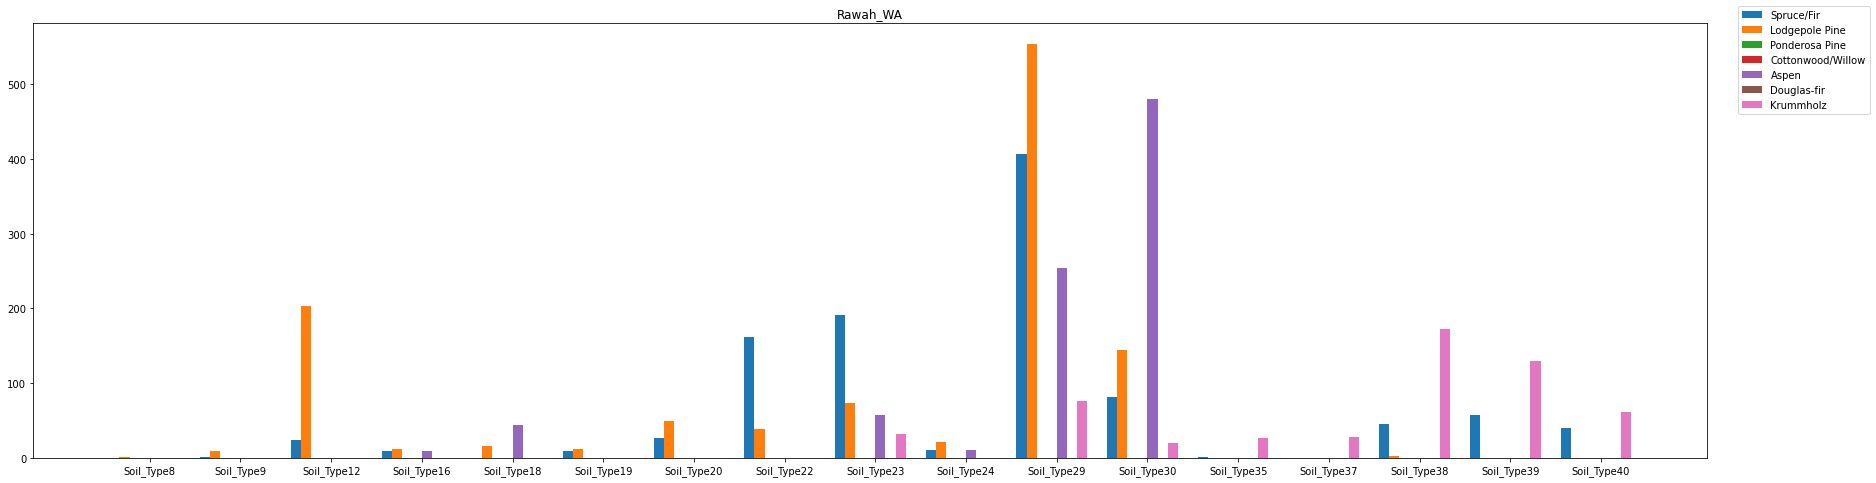

,Soil_Type8,Soil_Type9,Soil_Type12,Soil_Type16,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type29,Soil_Type30,Soil_Type35,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Spruce/Fir,0,1,24,9,0,9,26,162,191,10,406,81,1,0,45,57,40
Lodgepole Pine,1,9,203,12,16,12,49,38,73,21,554,144,0,0,2,0,0
Ponderosa Pine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cottonwood/Willow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aspen,0,0,0,9,44,0,0,0,58,11,254,480,0,0,0,0,0
Douglas-fir,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Krummholz,0,0,0,0,0,0,0,0,32,0,76,20,27,28,172,129,61


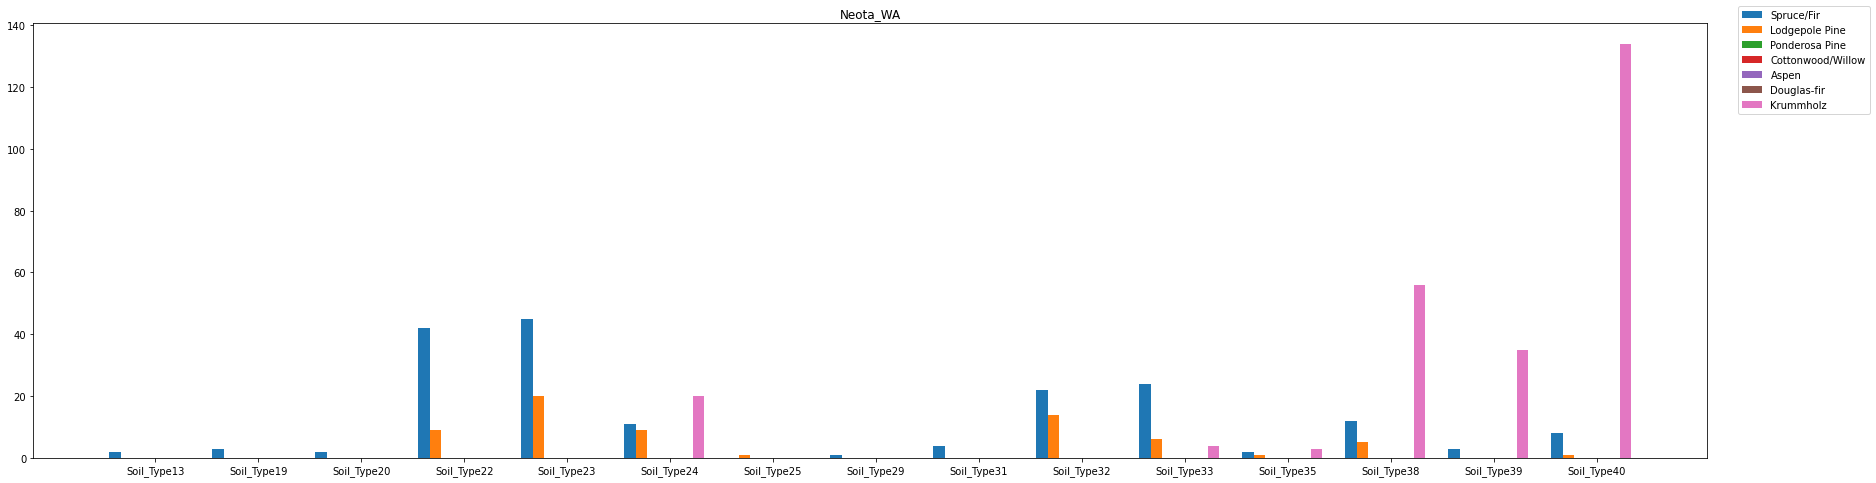

,Soil_Type13,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type29,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
Spruce/Fir,2,3,2,42,45,11,0,1,4,22,24,2,12,3,8
Lodgepole Pine,0,0,0,9,20,9,1,0,0,14,6,1,5,0,1
Ponderosa Pine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cottonwood/Willow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aspen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Douglas-fir,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Krummholz,0,0,0,0,0,20,0,0,0,0,4,3,56,35,134


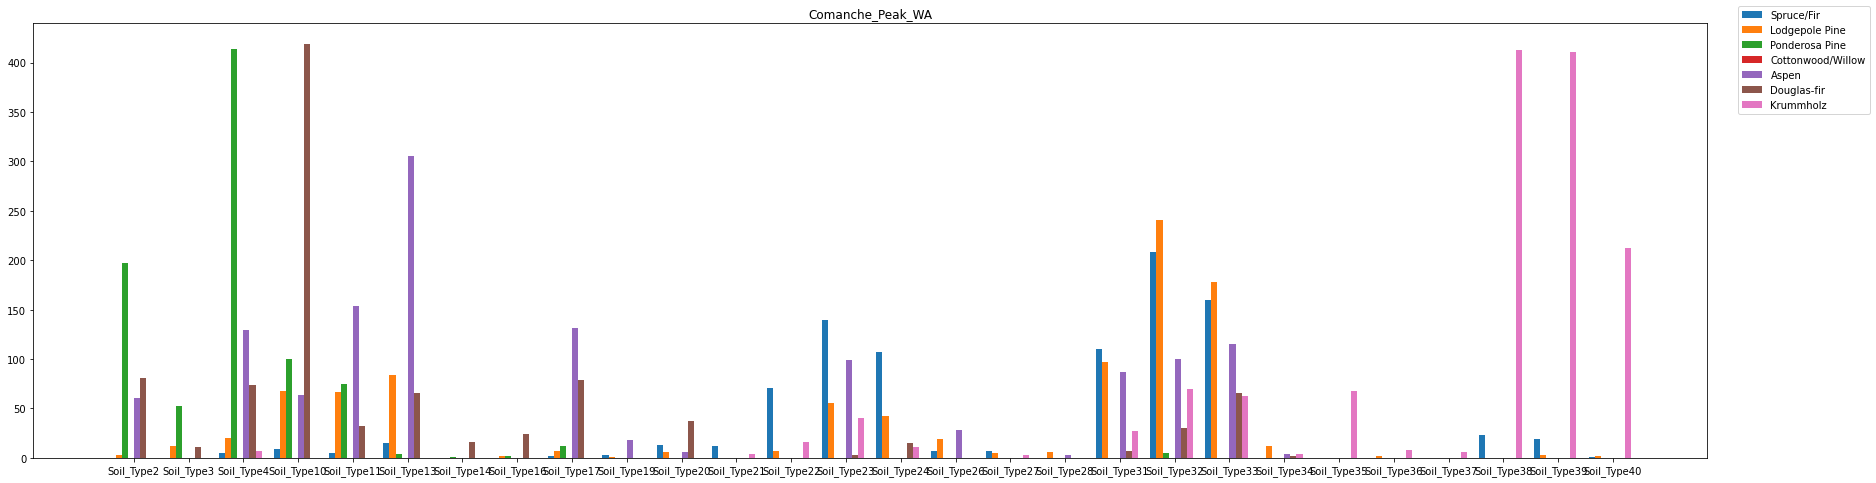

,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type10,Soil_Type11,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type19,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Spruce/Fir,0,0,5,9,5,15,0,0,2,3,...,110,208,160,0,0,0,0,23,19,1
Lodgepole Pine,3,12,20,68,67,84,0,2,7,1,...,97,241,178,12,0,2,0,0,3,2
Ponderosa Pine,197,53,414,100,75,4,1,2,12,0,...,0,5,0,0,0,0,0,0,0,0
Cottonwood/Willow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aspen,61,0,129,64,154,305,0,0,131,18,...,87,100,115,4,0,0,0,0,0,0
Douglas-fir,81,11,74,419,32,66,16,24,79,0,...,7,30,66,2,0,0,0,0,0,0
Krummholz,0,0,7,0,0,0,0,0,0,0,...,27,70,63,4,68,8,6,413,411,212


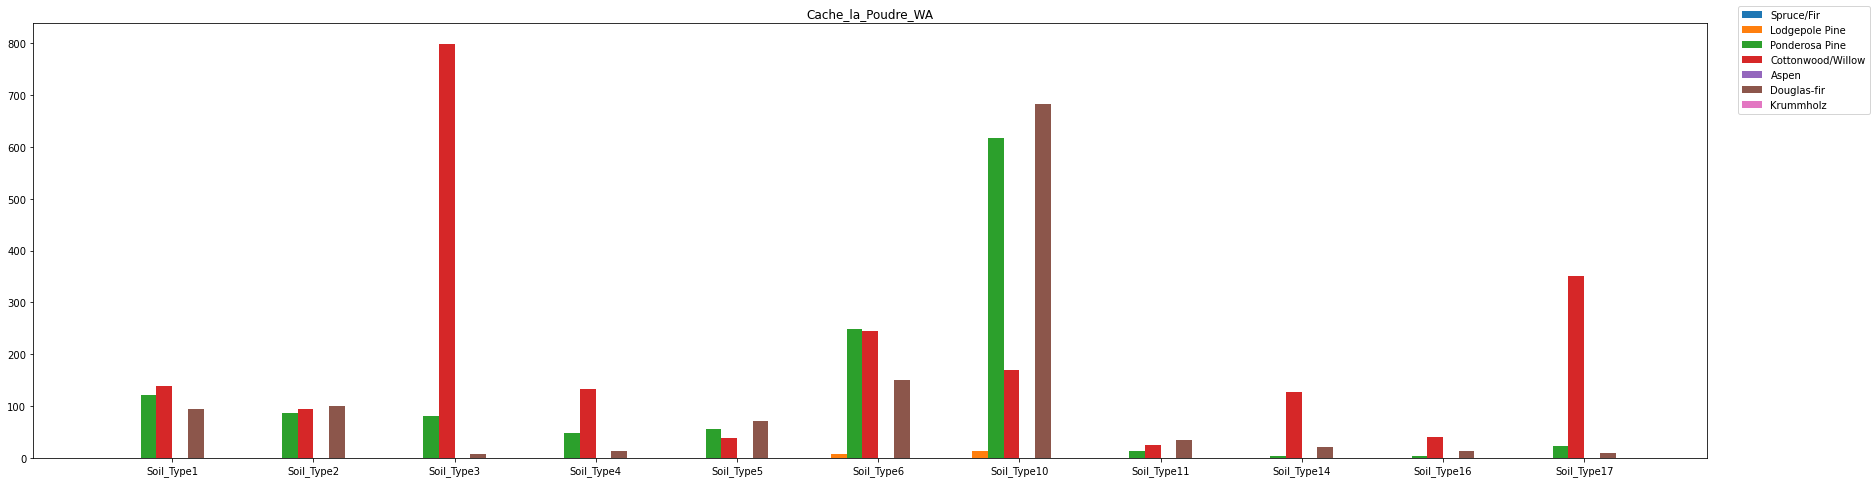

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type10,Soil_Type11,Soil_Type14,Soil_Type16,Soil_Type17
Spruce/Fir,0,0,0,0,0,0,0,0,0,0,0
Lodgepole Pine,0,0,0,0,0,7,13,0,0,0,0
Ponderosa Pine,121,86,80,48,55,248,617,14,3,3,22
Cottonwood/Willow,139,94,799,133,39,244,170,24,128,40,350
Aspen,0,0,0,0,0,0,0,0,0,0,0
Douglas-fir,95,101,7,13,71,151,682,35,21,13,9
Krummholz,0,0,0,0,0,0,0,0,0,0,0


In [29]:
for i in range(10,14):
    a = data.iloc[:, i] == 1
    final,t = [],[]
    temp_df = pd.DataFrame()
    for j in range(14, 54):
        b = data.iloc[:, j] == 1
        if not data[a & b].empty:
            t.append(data.keys()[j])
            temp = []
            for k in range(1, 8):
                c = data.iloc[:, 54] == k
                if not data[a & b].empty:
                    temp.append(len(data[a & b & c]))
                    
            #Append Column to Table
            temp_df[soil_title[j-14]] = temp
            
            final.append(temp)
    
    draw_adjacent_graph(final, t, w_title[i-10])
    
    #Draw Table
    temp_df.index = cvr_title
    display(temp_df)

# Numerical Features

#### Spcial Features Graph

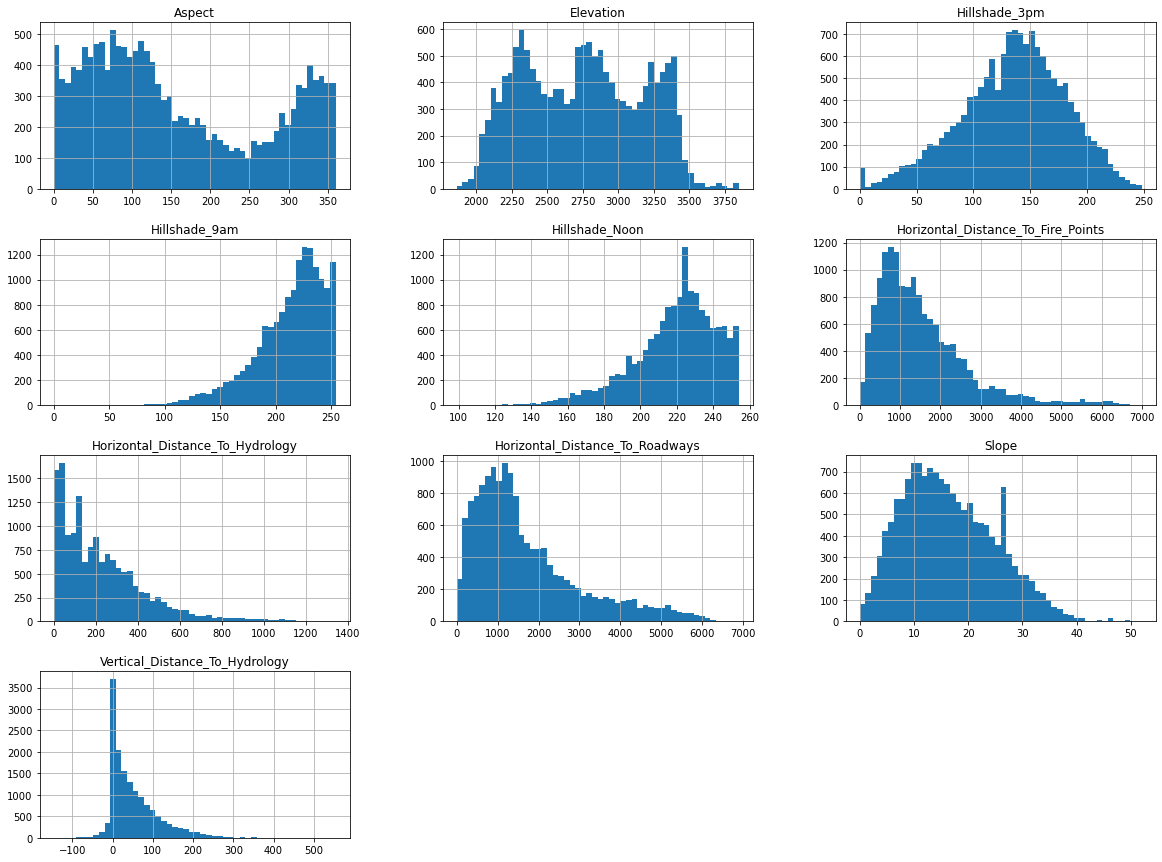

In [30]:
data.iloc[:,:10].hist(bins=50, figsize=(20,15))
plt.show()

#### Relationship Between the Special Features And Cover Types

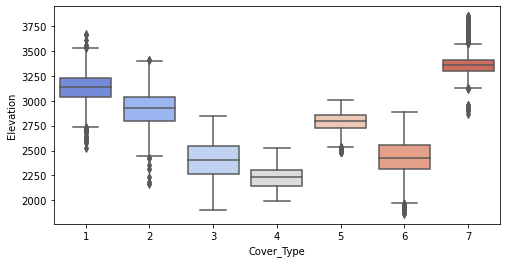

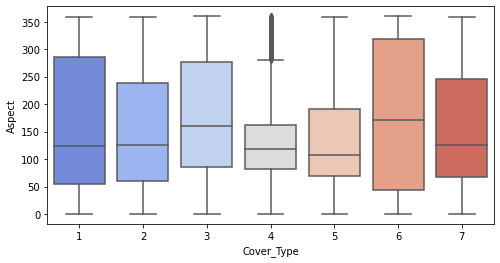

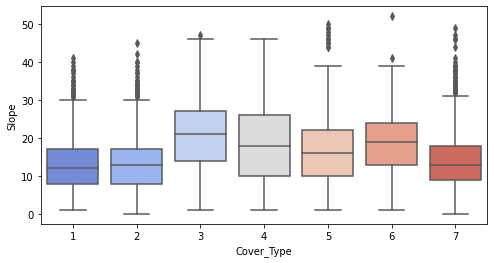

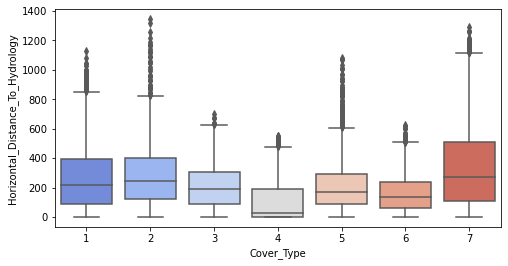

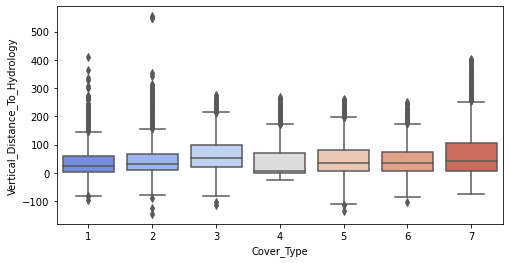

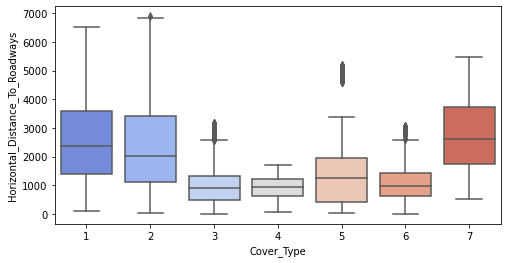

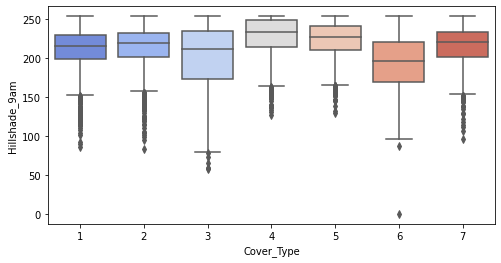

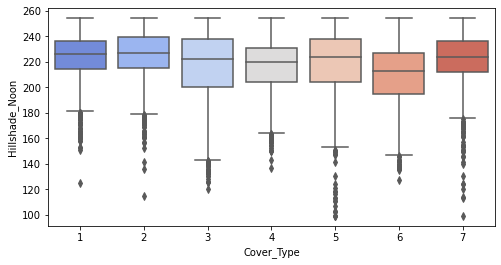

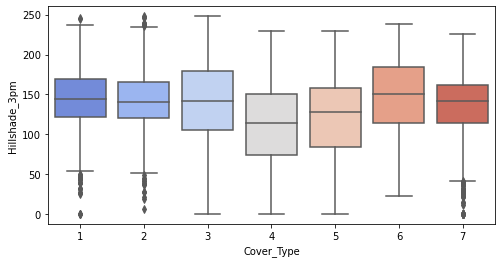

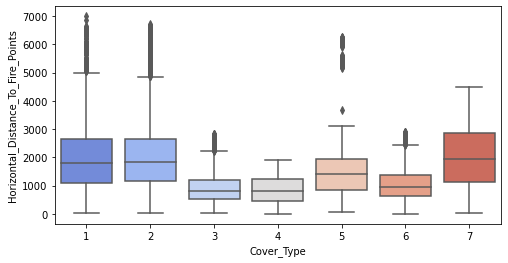

In [31]:
import seaborn as sns

sp_feature = data.iloc[:,:10]
temp =data['Cover_Type'].astype('category') #To convert target class into category

for i, col in enumerate(sp_feature.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=temp, y=col, data=data, palette="coolwarm")


# Correlation

Data Correlation is a way to understand the relationship between multiple variables and attributes in the dataset. Using Correlation, we can gain extra insights:
- One or multiple attributes depend on another attribute or a cause for another attribute.
- One or multiple attributes are associated with other attributes.

In [32]:
data_corr = data.iloc[:,:10].corr() #relationship between features
data_corr

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
Horizontal_Distance_To_Hydrology,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
Vertical_Distance_To_Hydrology,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
Horizontal_Distance_To_Roadways,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162
Horizontal_Distance_To_Fire_Points,0.443563,-0.052169,-0.239527,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000


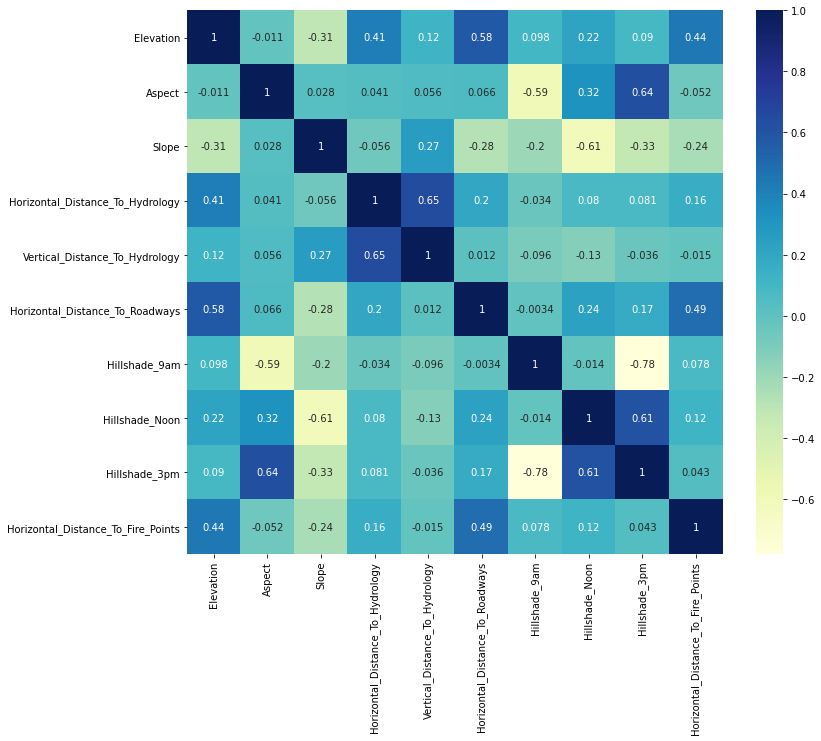

In [33]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(data_corr,annot=True,cmap='YlGnBu')
plt.show()

From the above heatmap, there are a few features with a good amount of correlation:

Positive Correlation:
- Elevation and Horizontal_Distance_To_Roadways
- Aspect and Hillshade at 3pm
- Horizontal Distance to hydrology and Vertical Distance to Hydrology
- Hillshade at 3pm and Hillshade at Noon

Negative Correlation: 
- Aspect and Hillshade at 9am
- Slope and Hillshade at Noon
- Hillshade at 9am and Hillshade at 3pm

# Data Cleaning

#### Remove Unnecessary Columns
We achieve this by removing columns that has a standard deviation of 0

In [34]:
print("Before, Data.Shape: ", data.shape)
t_drop = data.std()[data.std()== 0].keys()
data.drop(t_drop, axis = 1, inplace = True)
print("After, Data.Shape: ", data.shape)

Before, Data.Shape:  (15120, 55)
After, Data.Shape:  (15120, 53)


Remove Outliers

In [35]:
#this function detects first and third quartile and interquartile range for each column
#then calculates upper and lower limits to determine outliers conservatively
#returns the number of lower and upper limit and number of outliers respectively

def outlier(df, col):
    
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR = q3 - q1
                      
    upper_limit = q3+(3*IQR)
    lower_limit = q1-(3*IQR)
    count = 0     #To count how many outliers
                      
    for value in df[col].tolist():
        if (value < lower_limit) | (value > upper_limit):
            count +=1
    return lower_limit, upper_limit, count

print("Before, Data.Shape: ", data.shape)

# loop through all columns to see if there are any outliers
for i in data.columns:
    if outlier(data, i)[2] > 0:
        print("There are {} outliers in {}".format(outlier(data, i)[2], i))

#Remove the outlier from: Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Points
#because other attrubutes' data range is already fixed between 0 and 255
#or one-hot-encoded columns (Soil_Type and Wilderness_Area)

data= data[(data['Horizontal_Distance_To_Fire_Points'] > outlier(data, 'Horizontal_Distance_To_Fire_Points')[0]) & (data['Horizontal_Distance_To_Fire_Points'] < outlier(data, 'Horizontal_Distance_To_Fire_Points')[1])]
print("After, Data.Shape: ", data.shape) #Shape of forest after removing outliers


Before, Data.Shape:  (15120, 53)
There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 6

# Data Modeling

Remove Data With Large Skewness

In [36]:
print("Before, Data.Shape: ", data.shape)
data.drop(["Soil_Type8","Soil_Type25"], axis = 1, inplace = True)
print("After, Data.Shape: ", data.shape)

Before, Data.Shape:  (14988, 53)
After, Data.Shape:  (14988, 51)


The data are too positively skewed, they have to be removed because we do not have enough data for these two columns in our dataset.

# Data Preprocessing

In [37]:
x = data.drop("Cover_Type", axis = 1)
y = data.Cover_Type

print("X shape: ",x.shape)
print("Y shape: ",y.shape)

X shape:  (14988, 50)
Y shape:  (14988,)


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 48)

print("X_train shape: ",x_train.shape)
print("Y_train shape: ",y_train.shape)
print("X_test shape: ",x_test.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (11990, 50)
Y_train shape:  (11990,)
X_test shape:  (2998, 50)
Y_test shape:  (2998,)


In [39]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
#Explanation

In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

# Model Training

For this Model, we have used a total of 6 algorithms:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- K Nearest Neighbor
- Support Vector Machine (SVM)
- Extra Tree Classifier

In [41]:
sco = ['accuracy','precision_macro','recall_macro','f1_macro']
report = pd.DataFrame(columns=["Fit time","Score time","Accuracy","Precision","Recall","F1 Score"])
clf = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "K Nearest Neighbor(KNN)", "Support Vector Machine(SVM)", "Extra Tree Classifier"]
model_arr = {}
y_pred_arr = {}
report_a = pd.DataFrame(columns=["Accuracy"])

In [42]:
def calc(model, i):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train) 
    report_a.loc[i] = round(accuracy_score(y_pred, y_train)*100,4)
    print("Accuracy: ",round(accuracy_score(y_pred, y_train)*100,4))

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
calc(model, 0)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
calc(model, 2)

from sklearn import svm
C_opt = 10 # reasonable option
model = svm.SVC(C=C_opt, kernel='rbf')
calc(model, 4)

Accuracy:  70.9008
Accuracy:  89.166
Accuracy:  82.6439


#### Overfitting

In [44]:
from sklearn.tree import DecisionTreeClassifier as dtc
model = dtc()
calc(model, 1)

Accuracy:  100.0


In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
calc(model, 3)

Accuracy:  100.0


In [46]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
calc(model, 5)

Accuracy:  100.0


As we can see from the above three algorithms, the data has overfitted for these three algorithms
 Thus, we will perform k-fold cross validation for all algorithms to prevent overfitting.

#### Cross Validation

In [47]:
def calc_cross_val(model, i, x = x_train, y = y_train):
    model.fit(x_train, y_train)
    model_arr[clf[i]] = model
    y_pred = cross_validate(model, x, y, cv=10, scoring=sco)
    report_b = pd.DataFrame(y_pred)
    report.loc[clf[i]] = ["{:.4f}".format(i) for i in report_b.mean().values]

In [48]:
model = LogisticRegression(max_iter = 1000)
calc_cross_val(model, 0)

model = dtc(random_state=42)
calc_cross_val(model, 1)

model = RandomForestClassifier(random_state=42)
calc_cross_val(model, 2)

model = KNeighborsClassifier(n_neighbors = 3)
calc_cross_val(model, 3)

C_opt = 10 # reasonable option
model = svm.SVC(C=C_opt, kernel='rbf')
calc_cross_val(model, 4)

model = ExtraTreesClassifier(random_state=42)
calc_cross_val(model, 5)

### Comparison of algorithms with and without Cross Validation

In [49]:
report_a = report_a.sort_index(ascending=True)
report_a.index = clf

#### Without Cross Validation

In [50]:
report_a

,Accuracy
Logistic Regression,70.9008
Decision Tree Classifier,100.0000
Random Forest Classifier,89.1660
K Nearest Neighbor(KNN),100.0000
Support Vector Machine(SVM),82.6439
Extra Tree Classifier,100.0000


#### Without Cross Validation Graph

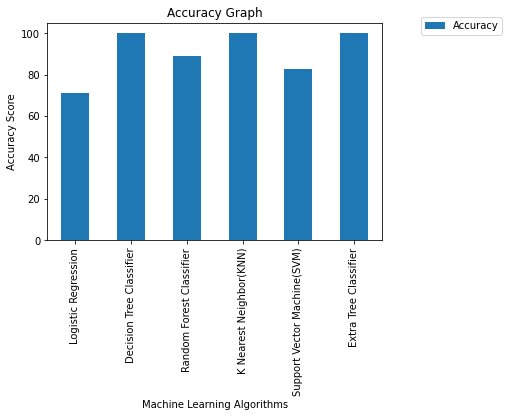

In [51]:
pd.DataFrame([float(i) for i in report_a.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Graph")
plt.show()

#### With Cross Validation

In [52]:
pd.DataFrame(report.Accuracy)

,Accuracy
Logistic Regression,0.7033
Decision Tree Classifier,0.7805
Random Forest Classifier,0.8561
K Nearest Neighbor(KNN),0.7888
Support Vector Machine(SVM),0.7900
Extra Tree Classifier,0.8588


#### With Cross Validation Graph

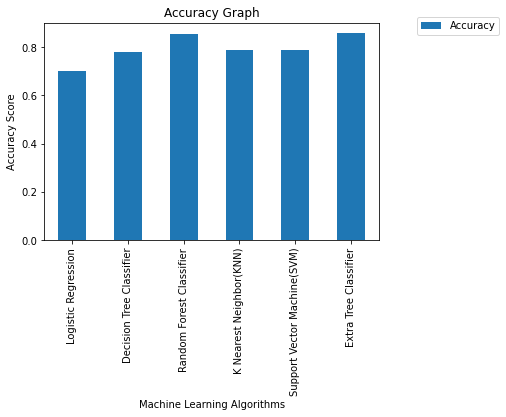

In [53]:
pd.DataFrame([float(i) for i in report.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Graph")
plt.show()

As we can see from the above two tables, algorithms without cross validation has an overall higher accuracy score. However, it has three algorithms with an accuracy score of a 100. It is most likely overfitted. Therefore, we have to perform cross validation on each algorithms

# Overview Report

In [54]:
report

,Fit time,Score time,Accuracy,Precision,Recall,F1 Score
Logistic Regression,3.2948,0.0053,0.7033,0.6990,0.7025,0.6989
Decision Tree Classifier,0.1231,0.0046,0.7805,0.7771,0.7791,0.7774
Random Forest Classifier,1.7912,0.0390,0.8561,0.8532,0.8551,0.8531
K Nearest Neighbor(KNN),0.3755,0.8594,0.7888,0.7837,0.7876,0.7834
Support Vector Machine(SVM),3.0473,0.4855,0.7900,0.7856,0.7890,0.7857
Extra Tree Classifier,1.3125,0.0446,0.8588,0.8560,0.8578,0.8560


The above table shows how each classification algorithm perform according to it's time, accuracy, precision, recall and F1 score

Based on the above table, we can conclude a few things:
- Logistic Regression has the longest time spent with the lowest accuracy
- Decision Tree Classifier has the shortest time spent
- Extra Tree Classifier and Random Forest Classifier has roughly the same accuracy score
- For each algorithms, their precision, recall and F1 Score are roughly the same

# Overview Graph

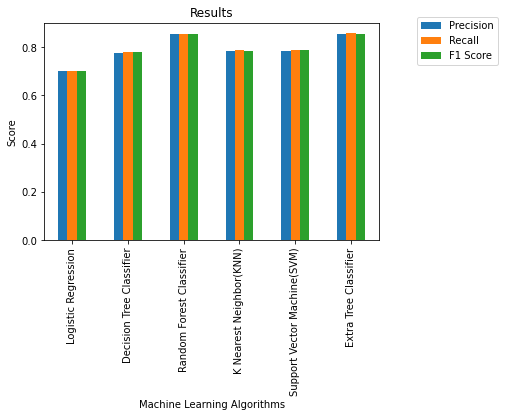

In [55]:
prec = [float(i) for i in report['Precision']]
recl = [float(i) for i in report['Recall']]
f1_sc = [float(i) for i in report['F1 Score']]
pd.DataFrame([prec,recl,f1_sc], columns=clf, index=['Precision','Recall','F1 Score']).transpose().plot.bar()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Score")
plt.title("Results")
plt.show()

# Classification Report

In [56]:
def clf_report(model, i):
    model.fit(x_train, y_train)
    y_pred = cross_val_predict(model, x_train, y_train, cv=10)
    y_pred_arr[clf[i]] = y_pred
    print(clf[i])
    display(pd.DataFrame(classification_report(y_train, y_pred, target_names=[cvr_title[i] for i in range(len(cvr_title))], output_dict=True)).transpose())

In [57]:
clf_report(model_arr[clf[0]],0)

Logistic Regression


,precision,recall,f1-score,support
Spruce/Fir,0.650087,0.670644,0.660206,1676.000000
Lodgepole Pine,0.620813,0.518761,0.565217,1679.000000
Ponderosa Pine,0.616129,0.546026,0.578963,1749.000000
Cottonwood/Willow,0.800000,0.870273,0.833658,1719.000000
Aspen,0.720930,0.797195,0.757147,1711.000000
Douglas-fir,0.601117,0.630346,0.615385,1707.000000
Krummholz,0.880410,0.883934,0.882168,1749.000000
accuracy,0.703253,0.703253,0.703253,0.703253
macro avg,0.698498,0.702454,0.698963,11990.000000
weighted avg,0.699262,0.703253,0.699752,11990.000000


In [58]:
clf_report(model_arr[clf[1]],1)

Decision Tree Classifier


,precision,recall,f1-score,support
Spruce/Fir,0.651747,0.634248,0.642879,1676.000000
Lodgepole Pine,0.620711,0.592615,0.606338,1679.000000
Ponderosa Pine,0.755162,0.731847,0.743322,1749.000000
Cottonwood/Willow,0.905789,0.928447,0.916978,1719.000000
Aspen,0.848673,0.878434,0.863297,1711.000000
Douglas-fir,0.758581,0.763913,0.761238,1707.000000
Krummholz,0.893864,0.924528,0.908938,1749.000000
accuracy,0.780484,0.780484,0.780484,0.780484
macro avg,0.776361,0.779147,0.777570,11990.000000
weighted avg,0.777538,0.780484,0.778826,11990.000000


In [59]:
clf_report(model_arr[clf[2]],2)

Random Forest Classifier


,precision,recall,f1-score,support
Spruce/Fir,0.773736,0.748807,0.761067,1676.00000
Lodgepole Pine,0.778827,0.687909,0.730550,1679.00000
Ponderosa Pine,0.842136,0.811321,0.826441,1749.00000
Cottonwood/Willow,0.922949,0.968586,0.945217,1719.00000
Aspen,0.897564,0.947399,0.921808,1711.00000
Douglas-fir,0.826185,0.857645,0.841621,1707.00000
Krummholz,0.927393,0.963979,0.945332,1749.00000
accuracy,0.856130,0.856130,0.856130,0.85613
macro avg,0.852684,0.855092,0.853148,11990.00000
weighted avg,0.853371,0.856130,0.854017,11990.00000


In [60]:
clf_report(model_arr[clf[3]],3)

K Nearest Neighbor(KNN)


,precision,recall,f1-score,support
Spruce/Fir,0.700247,0.676014,0.687917,1676.000000
Lodgepole Pine,0.680507,0.575938,0.623871,1679.000000
Ponderosa Pine,0.765300,0.693539,0.727654,1749.000000
Cottonwood/Willow,0.874388,0.935428,0.903879,1719.000000
Aspen,0.810602,0.920514,0.862069,1711.000000
Douglas-fir,0.740193,0.762742,0.751298,1707.000000
Krummholz,0.909589,0.949114,0.928931,1749.000000
accuracy,0.788824,0.788824,0.788824,0.788824
macro avg,0.782975,0.787613,0.783660,11990.000000
weighted avg,0.783911,0.788824,0.784740,11990.000000


In [61]:
clf_report(model_arr[clf[4]],4)

Support Vector Machine(SVM)


,precision,recall,f1-score,support
Spruce/Fir,0.721755,0.716587,0.719162,1676.000000
Lodgepole Pine,0.716513,0.602144,0.654369,1679.000000
Ponderosa Pine,0.712085,0.687250,0.699447,1749.000000
Cottonwood/Willow,0.859640,0.944154,0.899917,1719.000000
Aspen,0.831522,0.894214,0.861729,1711.000000
Douglas-fir,0.732824,0.731107,0.731965,1707.000000
Krummholz,0.922606,0.947399,0.934838,1749.000000
accuracy,0.789992,0.789992,0.789992,0.789992
macro avg,0.785278,0.788979,0.785918,11990.000000
weighted avg,0.785917,0.789992,0.786756,11990.000000


In [62]:
clf_report(model_arr[clf[5]],5)

Extra Tree Classifier


,precision,recall,f1-score,support
Spruce/Fir,0.780745,0.750000,0.765064,1676.000000
Lodgepole Pine,0.769180,0.698630,0.732210,1679.000000
Ponderosa Pine,0.852430,0.812464,0.831967,1749.000000
Cottonwood/Willow,0.920330,0.974404,0.946595,1719.000000
Aspen,0.900503,0.941555,0.920571,1711.000000
Douglas-fir,0.829584,0.864089,0.846485,1707.000000
Krummholz,0.935591,0.963408,0.949296,1749.000000
accuracy,0.858799,0.858799,0.858799,0.858799
macro avg,0.855480,0.857793,0.856027,11990.000000
weighted avg,0.856225,0.858799,0.856906,11990.000000


# Confusion Matrix

Confusion matrix splits the results into 4 quadrants, that is:
- TN (true negatives) are the number of negative samples that are correctly predicted as negative
- FP (false positives) are the number of negative samples that are falsely predicted as positive
- TP (true positives) are the number of positive samples that are correctly predicted as positive
- FN (false negatives) are the number of positive samples that are falsely predicted as negative

In [63]:
def confusion(i):
    print(clf[i])
    display(pd.DataFrame(confusion_matrix(y_train, y_pred_arr[clf[i]]),columns = ["Predicted "+cvr_title[i] for i in range(len(cvr_title))], index = ["Actual "+cvr_title[i] for i in range(len(cvr_title))]))

In [64]:
confusion(0)

Logistic Regression


,Predicted Spruce/Fir,Predicted Lodgepole Pine,Predicted Ponderosa Pine,Predicted Cottonwood/Willow,Predicted Aspen,Predicted Douglas-fir,Predicted Krummholz
Actual Spruce/Fir,1124,280,2,0,68,8,194
Actual Lodgepole Pine,391,871,28,0,303,70,16
Actual Ponderosa Pine,0,14,955,229,90,461,0
Actual Cottonwood/Willow,0,0,123,1496,0,100,0
Actual Aspen,19,220,33,0,1364,75,0
Actual Douglas-fir,0,17,408,145,61,1076,0
Actual Krummholz,195,1,1,0,6,0,1546


In [65]:
confusion(1)

Decision Tree Classifier


,Predicted Spruce/Fir,Predicted Lodgepole Pine,Predicted Ponderosa Pine,Predicted Cottonwood/Willow,Predicted Aspen,Predicted Douglas-fir,Predicted Krummholz
Actual Spruce/Fir,1063,392,4,0,47,6,164
Actual Lodgepole Pine,412,995,38,1,158,49,26
Actual Ponderosa Pine,1,41,1280,109,34,284,0
Actual Cottonwood/Willow,0,1,73,1596,0,49,0
Actual Aspen,28,118,33,0,1503,27,2
Actual Douglas-fir,10,43,267,56,27,1304,0
Actual Krummholz,117,13,0,0,2,0,1617


In [66]:
confusion(2)

Random Forest Classifier


,Predicted Spruce/Fir,Predicted Lodgepole Pine,Predicted Ponderosa Pine,Predicted Cottonwood/Willow,Predicted Aspen,Predicted Douglas-fir,Predicted Krummholz
Actual Spruce/Fir,1255,258,2,0,37,4,120
Actual Lodgepole Pine,305,1155,37,0,122,48,12
Actual Ponderosa Pine,0,8,1419,88,15,219,0
Actual Cottonwood/Willow,0,0,35,1665,0,19,0
Actual Aspen,3,46,23,0,1621,18,0
Actual Douglas-fir,0,13,169,51,10,1464,0
Actual Krummholz,59,3,0,0,1,0,1686


In [67]:
confusion(3)

K Nearest Neighbor(KNN)


,Predicted Spruce/Fir,Predicted Lodgepole Pine,Predicted Ponderosa Pine,Predicted Cottonwood/Willow,Predicted Aspen,Predicted Douglas-fir,Predicted Krummholz
Actual Spruce/Fir,1133,303,3,0,84,12,141
Actual Lodgepole Pine,384,967,42,2,206,54,24
Actual Ponderosa Pine,1,37,1213,144,43,311,0
Actual Cottonwood/Willow,0,1,59,1608,0,51,0
Actual Aspen,26,57,24,0,1575,29,0
Actual Douglas-fir,5,40,244,85,31,1302,0
Actual Krummholz,69,16,0,0,4,0,1660


In [68]:
confusion(4)

Support Vector Machine(SVM)


,Predicted Spruce/Fir,Predicted Lodgepole Pine,Predicted Ponderosa Pine,Predicted Cottonwood/Willow,Predicted Aspen,Predicted Douglas-fir,Predicted Krummholz
Actual Spruce/Fir,1201,278,1,0,64,8,124
Actual Lodgepole Pine,367,1011,36,0,198,52,15
Actual Ponderosa Pine,0,14,1202,169,34,330,0
Actual Cottonwood/Willow,0,0,64,1623,0,32,0
Actual Aspen,5,84,59,0,1530,33,0
Actual Douglas-fir,3,20,326,96,14,1248,0
Actual Krummholz,88,4,0,0,0,0,1657


In [69]:
confusion(5)

Extra Tree Classifier


,Predicted Spruce/Fir,Predicted Lodgepole Pine,Predicted Ponderosa Pine,Predicted Cottonwood/Willow,Predicted Aspen,Predicted Douglas-fir,Predicted Krummholz
Actual Spruce/Fir,1257,277,1,0,32,4,105
Actual Lodgepole Pine,287,1173,40,0,118,50,11
Actual Ponderosa Pine,0,11,1421,93,14,210,0
Actual Cottonwood/Willow,0,0,24,1675,0,20,0
Actual Aspen,7,46,28,0,1611,19,0
Actual Douglas-fir,0,13,153,52,14,1475,0
Actual Krummholz,59,5,0,0,0,0,1685


From the above confusion matrix, we can see the number of incorrect values predicted, and the number of correct values predicted according to each cover type.

# Binary Classification

Precision Recall Graph and ROC Curve are only available for binary class classification. However, for this dataset, our model is a multiclass problem. Therefore, out of the 7 cover types, we will have to select one cover type to perform precision recall and roc curve.

We have decided to choose the 5th Cover Type, Aspen, as it has the highest accuracy score in all algorithms

In [70]:
y_train_5 = y_train == 5
y_pred_5_arr = {}

#  Precision Recall Graph

Confusion Matrix may give us a lot of information, however we need a more concise evaluation metric. Therefore, we will be using the precision, recall and F1 score of each algorithms. 

We shall plot precision-recall performance on our training set to show the trade-off between these two measures as we adjust the threshold value.

The precision-recall graph automatically compute precision-recall pairs for different threshold values.

In [71]:
def plot_precision_vs_recall(model, i, x = x_train, y = y_train_5):
    model.fit(x_train, y_train_5)
    y_pred = cross_val_predict(model, x, y, cv=10)
    precisions, recalls, thresholds = precision_recall_curve(y, y_pred)
    y_pred_5_arr[clf[i]] = y_pred
    ax.plot(recalls, precisions, linewidth=3, label = clf[i])
    ax.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')

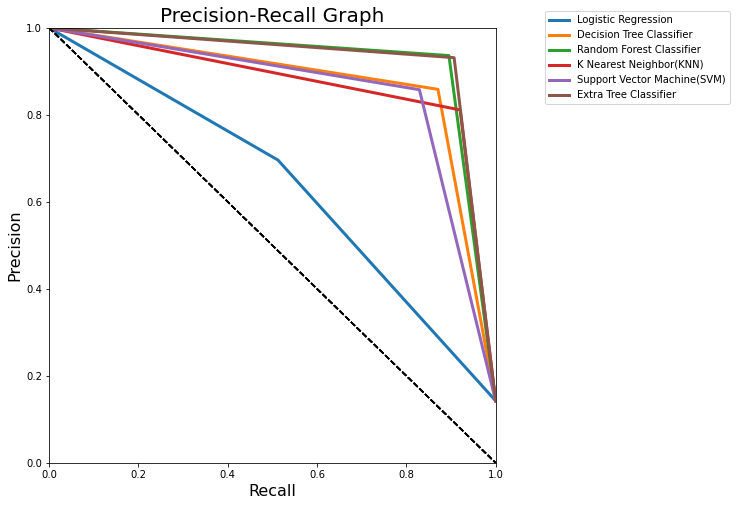

In [72]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(6):
    plot_precision_vs_recall(model_arr[clf[i]], i)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title ('Precision-Recall Graph', fontsize = 20)
plt.show()

The dotted line represents the P-R curve of a purely random classifier; a good classifier stays as far away from that line as possible (towards the top-right corner).

As we can see from the algorithms, Extra Tree Classifier is the furthest away from the dotted line, whereas Logistic Regression is the nearest to the dotted line.

# ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision vs recall, the ROC curve plots the true positive rate (TPR, another name for recall) against the false positive rate (FPR).

ROC Curve automatically compute FPR-TPR pairs for different threshold values.

In [73]:
def plot_roc_curve(i, y = y_train_5):
    fpr, tpr, treshold = roc_curve(y, y_pred_5_arr[clf[i]])
    ax.plot(fpr, tpr, linewidth = 3, label = clf[i])
    ax.plot([0,1], [0, 1], 'k--')

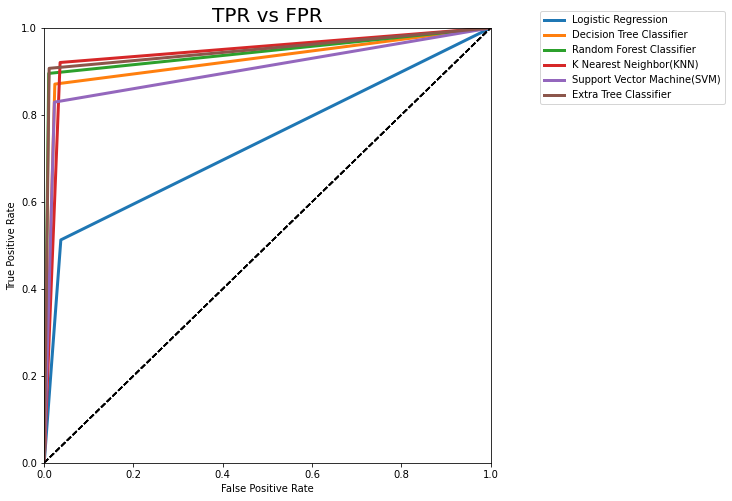

In [74]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(6):
    plot_roc_curve(i)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('TPR vs FPR', fontsize=20)
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (towards the top-left corner).

As we can see from the algorithms, Extra Tree Classifier is the furthest away from the dotted line, whereas Logistic Regression is the nearest to the dotted line.

One way to compare classifiers is to measure the area under the curve (AUC) measure. A perfect classifier will have a ROC AUC equal to 1 whereas a purely random classifier ROC AUC equal to 0.5.

In [75]:
roc_auc_score_arr = [roc_auc_score(y_train_5, y_pred_5_arr[clf[i]]) for i in range(6)]
auc_score_report = pd.DataFrame(roc_auc_score_arr, columns=["AUC Score"], index = clf)
auc_score_report

,AUC Score
Logistic Regression,0.737653
Decision Tree Classifier,0.923500
Random Forest Classifier,0.942633
K Nearest Neighbor(KNN),0.942454
Support Vector Machine(SVM),0.903239
Extra Tree Classifier,0.947991


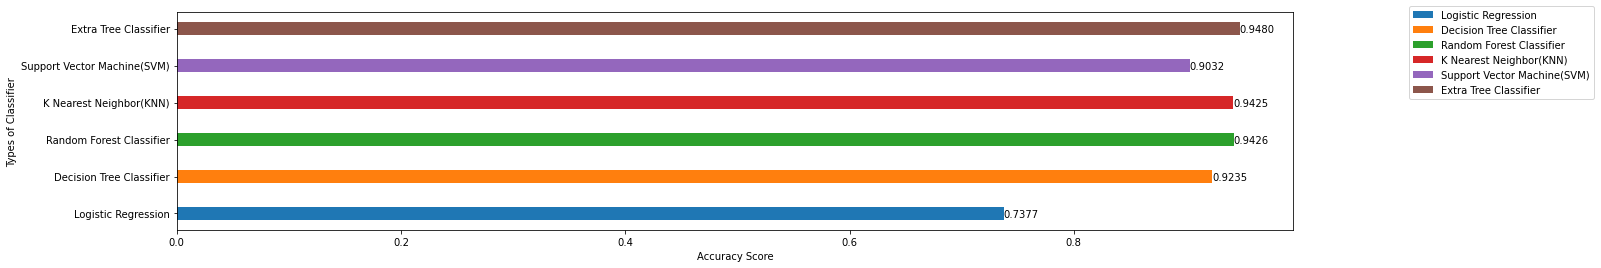

In [76]:
temp = auc_score_report["AUC Score"]
width = 0.35

fig, ax = plt.subplots(figsize=(20,4))

x1 = np.arange(len(temp))
for i in range(len(temp)):
    ax.barh(i,temp[i],width, label=report.index[i])
    ax.text(temp[i],i-0.1,"{:.4f}".format(temp[i]))

ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.yticks(x1,report.index)
plt.ylabel("Types of Classifier")
plt.xlabel("Accuracy Score")
plt.show()

As we can see from the above graph, Extra Tree Classifier has the highest AUC score, therefore, it is the most accurate. Thus, we will continue to perform fine tuning on the Extra Tree Classifier algorithm.

# Fine Tuning the model

So, now that we know what the best algorithm is (Extra Tree Classifier), we shall now fine tune the model. Each model comes with different hyperparameters. Hyperparameters are the settings of a machine learning that needs to be set prior to training. To find the best hyperparameter values for these settings, we shall use the Grid Search.

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# Create a range of trees to evaluate
n_estimators = [200, 350, 500]
min_samples_split = [2, 3, 5]
min_samples_leaf = [1, 2, 4]

skf = StratifiedKFold(shuffle=True, n_splits=5)

tree_grid = {'n_estimators': n_estimators,
            'min_samples_leaf': min_samples_leaf,
            'min_samples_split': min_samples_split}

# Grid Search Object using the trees range, the model and 5-fold cross validation
grid_search = GridSearchCV(estimator = ExtraTreesClassifier(max_depth=18, max_features=None, random_state=42), param_grid=tree_grid, 
                           cv = skf, scoring = 'accuracy', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [78]:
# fit the dataset to grid search object
grid_search.fit(x,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  7.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=ExtraTreesClassifier(max_depth=18, max_features=None,
                                            random_state=42),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [200, 350, 500]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [79]:
best_model = grid_search.best_estimator_
best_model

ExtraTreesClassifier(max_depth=18, max_features=None, n_estimators=500,
                     random_state=42)

In [80]:
extraTree_clf_w_grid_search = best_model

extraTree_clf_w_grid_search.fit(x_train, y_train)
y_pred = extraTree_clf_w_grid_search.predict(x_train)
round(accuracy_score(y_pred, y_train)*100,2)

99.3

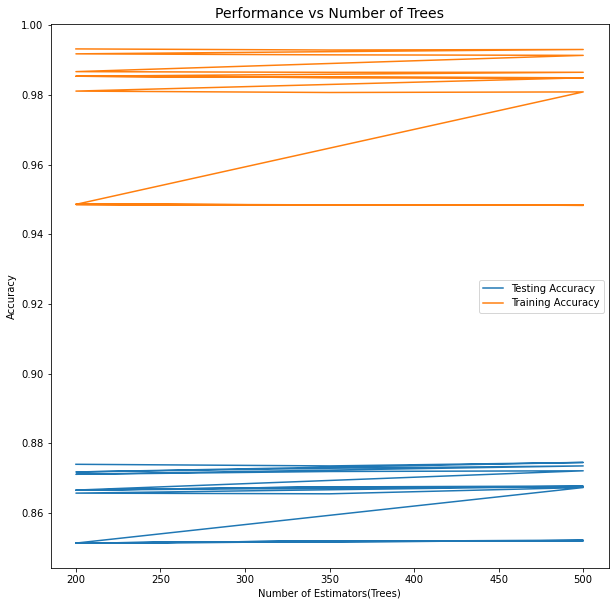

In [81]:
# Get the results into a dataframe
extraTree_results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.figure(figsize=(10,10))
plt.plot(extraTree_results['param_n_estimators'], extraTree_results['mean_test_score'], label = 'Testing Accuracy')
plt.plot(extraTree_results['param_n_estimators'], extraTree_results['mean_train_score'], label = 'Training Accuracy')

# set title, labels and legend
plt.xlabel('Number of Estimators(Trees)'); plt.ylabel('Accuracy'); plt.legend();
plt.title('Performance vs Number of Trees', size=14);

In [82]:
extraTree_results[["param_n_estimators", "params", "mean_train_score"]].sort_values(by="mean_train_score", ascending=False)

,param_n_estimators,params,mean_train_score
0,200,"{'min_samples_leaf': 1, 'min_samples_split': 2...",0.993195
2,500,"{'min_samples_leaf': 1, 'min_samples_split': 2...",0.993028
1,350,"{'min_samples_leaf': 1, 'min_samples_split': 2...",0.992878
3,200,"{'min_samples_leaf': 1, 'min_samples_split': 3...",0.991777
4,350,"{'min_samples_leaf': 1, 'min_samples_split': 3...",0.991493
5,500,"{'min_samples_leaf': 1, 'min_samples_split': 3...",0.991343
6,200,"{'min_samples_leaf': 1, 'min_samples_split': 5...",0.986673
8,500,"{'min_samples_leaf': 1, 'min_samples_split': 5...",0.986489
7,350,"{'min_samples_leaf': 1, 'min_samples_split': 5...",0.986473
12,200,"{'min_samples_leaf': 2, 'min_samples_split': 3...",0.985355


# Feature Importance

In [83]:
feat_imp = pd.DataFrame(extraTree_clf_w_grid_search.feature_importances_, index=x.columns, columns=['Score']).sort_values(ascending=False, by=['Score'])

In [84]:
#Print the 10 most important features
feat_imp.head(10)

,Score
Elevation,0.288611
Wilderness_Area4,0.092431
Horizontal_Distance_To_Roadways,0.069711
Horizontal_Distance_To_Hydrology,0.063141
Horizontal_Distance_To_Fire_Points,0.061188
Vertical_Distance_To_Hydrology,0.039031
Soil_Type10,0.033396
Hillshade_9am,0.032640
Hillshade_Noon,0.031447
Aspect,0.030251


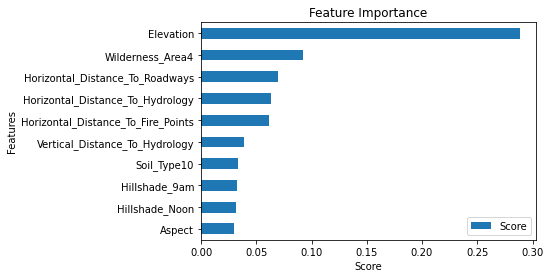

In [85]:
feat_imp.head(10).sort_values(ascending=True, by=['Score']).plot.barh()
plt.xlabel("Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

Based on the above graph, we can conclude that the 10 most important features for extra tree classifier to determine the cover type of the forest is:
- Elevation
- Wilderness Area 4
- Horizontal Distance To Roadways
- Horizontal Distance To Hydrology
- Horizontal Distance To Fire Points
- Soil Type 10
- Vertical Distance To Hydrology
- Hillshade 9am
- Hillshade Noon
- Aspect

# Testing the model

Now, we shall test our model on the test set to see how well it performs

#### Data Preprocessing(Test Set)

In [86]:
#reset
report = pd.DataFrame(columns=["Fit time","Score time","Accuracy","Precision","Recall","F1 Score"])
y_pred_5_arr = {}

#Preprocessing
x_test = scale.fit_transform(x_test)

#new Data
y_test_5 = y_test == 5
clf.append("Extra Tree Classifier(HyperTuned)")

In [87]:
#Logistic Regression
model = LogisticRegression(max_iter = 1000)
calc_cross_val(model, 0, x_test, y_test)

#Decision Tree Classifier
model = dtc(random_state = 42)
calc_cross_val(model, 1, x_test, y_test)

#Random Forest Classifier
model = RandomForestClassifier(random_state = 42)
calc_cross_val(model, 2, x_test, y_test)

#K Nearest Neighbor
model = KNeighborsClassifier(n_neighbors = 3)
calc_cross_val(model, 3, x_test, y_test)

#Support Vector Machine
C_opt = 10 # reasonable option
model = svm.SVC(C=C_opt, kernel='rbf')
calc_cross_val(model, 4, x_test, y_test)

#Extra Tree Classifier
model = ExtraTreesClassifier(random_state = 42)
calc_cross_val(model, 5, x_test, y_test)

#Extra Tree Classifier(HyperTuned)
extraTree_clf_w_grid_search = best_model
calc_cross_val(extraTree_clf_w_grid_search, 6, x_test, y_test)

#### Overview Report (Test Set)

In [88]:
report

,Fit time,Score time,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.5275,0.0041,0.7021,0.7015,0.7010,0.6979
Decision Tree Classifier,0.0273,0.0028,0.7158,0.7177,0.7151,0.7146
Random Forest Classifier,0.4795,0.0172,0.8112,0.8105,0.8104,0.8075
K Nearest Neighbor(KNN),0.0377,0.0598,0.7091,0.7105,0.7085,0.7061
Support Vector Machine(SVM),0.2611,0.0347,0.7452,0.7468,0.7443,0.7421
Extra Tree Classifier,0.3650,0.0182,0.8015,0.8006,0.8006,0.7976
Extra Tree Classifier(HyperTuned),4.3187,0.3148,0.8139,0.8125,0.8127,0.8095


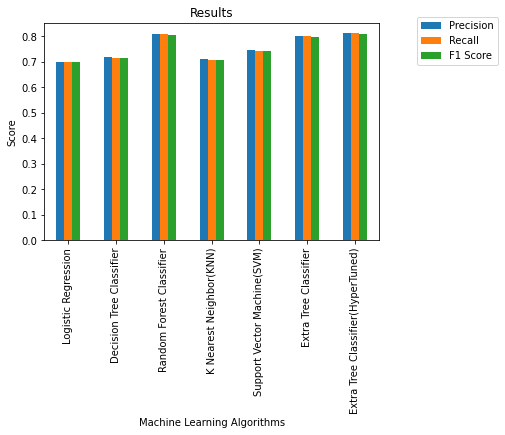

In [89]:
prec = [float(i) for i in report['Precision']]
recl = [float(i) for i in report['Recall']]
f1_sc = [float(i) for i in report['F1 Score']]
pd.DataFrame([prec,recl,f1_sc], columns=clf, index=['Precision','Recall','F1 Score']).transpose().plot.bar()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Score")
plt.title("Results")
plt.show()

#### Accuracy

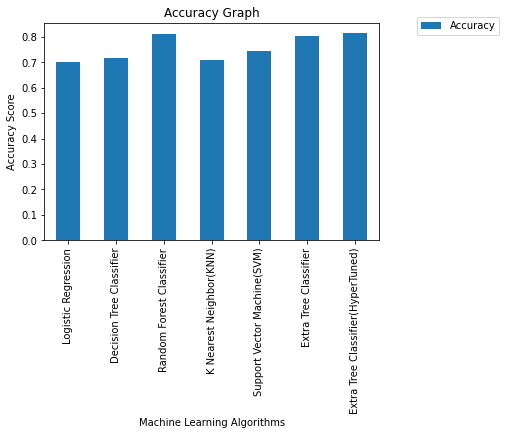

In [90]:
pd.DataFrame([float(i) for i in report.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Graph")
plt.show()

#### Precision Recall Graph(Test Set)

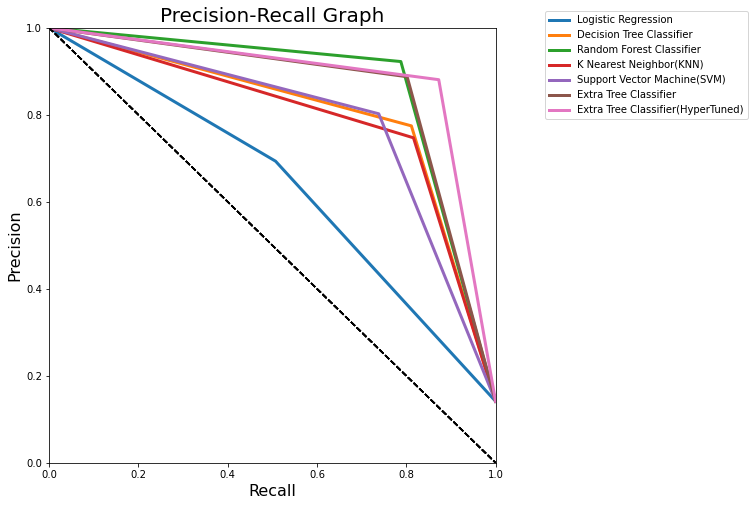

In [91]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(7):
    plot_precision_vs_recall(model_arr[clf[i]], i, x_test, y_test_5)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title ('Precision-Recall Graph', fontsize = 20)
plt.show()

As we can see from the algorithms, Extra Tree Classifier(HyperTuned) is the furthest away from the dotted line, whereas Logistic Regression is the nearest to the dotted line.

#### ROC Curve(Test Set)

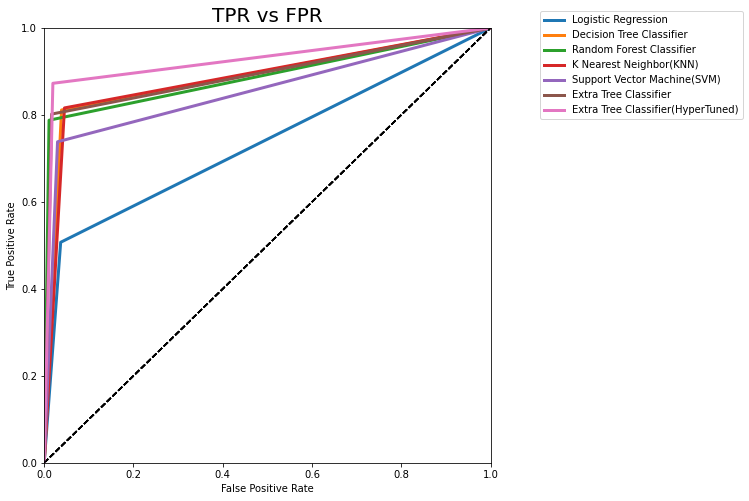

In [92]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(7):
    plot_roc_curve(i, y_test_5)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.1, 1.05))

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('TPR vs FPR', fontsize=20)
plt.show()

Again, As we can see from the algorithms, Extra Tree Classifier(HyperTuned) is the furthest away from the dotted line, whereas Logistic Regression is the nearest to the dotted line.

In [93]:
roc_auc_score_arr = [roc_auc_score(y_test_5, y_pred_5_arr[clf[i]]) for i in range(7)]
auc_score_report = pd.DataFrame(roc_auc_score_arr, columns=["AUC Score"], index = clf)
auc_score_report

,AUC Score
Logistic Regression,0.735084
Decision Tree Classifier,0.886235
Random Forest Classifier,0.888429
K Nearest Neighbor(KNN),0.885292
Support Vector Machine(SVM),0.854147
Extra Tree Classifier,0.892591
Extra Tree Classifier(HyperTuned),0.926608


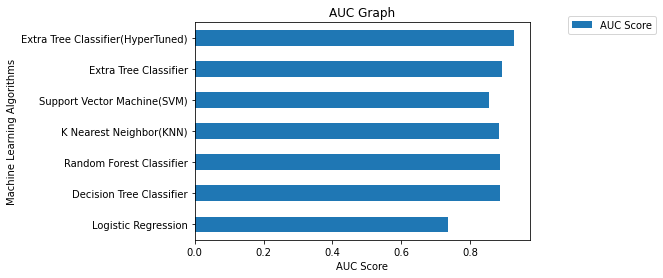

In [94]:
auc_score_report.plot.barh()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel("Machine Learning Algorithms")
plt.xlabel("AUC Score")
plt.title("AUC Graph")
plt.show()

Thus, we can see the Extra Tree Classifier(HyperTuned) with the parameters max_depth=18, max_features=None and n_estimators = 500 is the best algorithm as it has the highest auc score compared to other algorithms.